# Optimization in Python

### Task(Variante 6)
To feed the plants, it is necessary to apply: at least 24 units of the chemical
substance В1, 30 units of the chemical substance В2 and 15 units of the chemical
substance В3 per hectare. All these substances are contained in combined additives
U1 and U2 in certain amounts that is shown in the table. What amount of each
fertilizer should be acquired to provide the necessary fertilizing but minimize the
total costs of the fertilizers?

|  | B1 | B2 | B3 | Cost of an unit $| 
| :--- | --- | --- | --- | --- |
| C1 | 3 | 4 | 1 | 3 |
| C2 | 2 | 5 | 3 | 5 |
| amount | 24 | 30 | 15 |



 \begin{cases}
   3x_1+2x_2\leq 24 
   \\
   4x_1+5x_2\leq 30
   \\
   x_1+3x_2\leq 15
   \\
   x_1,x_2\geq 0
 \end{cases}
    
\begin{equation}
    \bar{z}=3x_1+5x_2\to max
\end{equation}

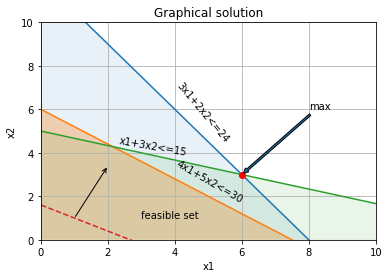

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def z(x1):
    return (8-3*x1)/5

def A1(x1):
    return (24-3*x1)/2

def A2(x1):
    return (30-4*x1)/5

def A3(x1):
    return (15-x1)/3

x1 = np.arange(0, 30, 0.1)
y = np.array(np.random.randint(0,20,(25,)))
plt.axis([0,10,0,10])
plt.grid(True)
plt.plot(x1,A1(x1))
plt.fill_between(x1,A1(x1), alpha=0.1)
plt.plot(x1,A2(x1))
plt.fill_between(x1,A2(x1), alpha=0.3)
plt.plot(x1,A3(x1))
plt.fill_between(x1,A3(x1), alpha=0.1)

plt.plot(x1, z(x1),'--')
plt.plot(6,3,'ro')
plt.annotate('max',xy=(6,3),xytext=(8,6),arrowprops=dict(arrowstyle='simple'))
plt.annotate('', xy=(2,z(2)+3),xytext=(1,z(1)), arrowprops=dict(arrowstyle='->'))
plt.text(3,1,"feasible set")
plt.text(4,1.7,'4x1+5x2<=30', rotation=-30)
plt.text(4,4.5,'3x1+2x2<=24', rotation=-50)
plt.text(2.3,3.9,'x1+3x2<=15', rotation=-10)

plt.title('Graphical solution')
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

### using scipy.optimize.

In [4]:
from scipy.optimize import linprog
import time


c=[-3,-5]
aub=[[3,2],[4,5],[1,3]]
bub=[24,30,15]
x1b=(0,None)
x2b=(0,None)
%time res = linprog(c, A_ub=aub, b_ub=bub, bounds=[x1b, x2b], method='revised simplex')

Wall time: 15 ms


In [6]:
print("Scipy solution: ")
print(res)
print("Optimal value: ", -res.fun)

Scipy solution: 
     con: array([], dtype=float64)
     fun: -27.857142857142854
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([9., 0., 0.])
  status: 0
 success: True
       x: array([2.14285714, 4.28571429])
Optimal value:  27.857142857142854


### using pulp.LpProblem.

In [8]:
import pulp

In [9]:

x1 = pulp.LpVariable("x1",0)
x2 = pulp.LpVariable("x2",0)
problem = pulp.LpProblem("Problem", pulp.LpMaximize)
problem += 3*x1 + 5*x2, "obj func"
problem += 3*x1 + 2*x2 <= 24
problem += 4*x1 + 5*x2 <= 30
problem += x1 + 3*x2 <= 15

%time status = problem.solve()

Wall time: 156 ms


In [6]:
print("PulP solution is : ")
for var in problem.variables():
    print(var.name, "=", var.varValue)
print(pulp.value(problem.objective))

PulP solution is : 
x1 = 2.1428571
x2 = 4.2857143
27.857142800000005


### Comparing solutions

In [10]:
import numpy as np

In [11]:
np.allclose(-res.fun, pulp.value(problem.objective))

True

### 2) Solving transportation problem.

Transportation problem: There are 5 destinations (in columns) where the
products/goods are to be delivered from different 4 sources (in rows). ai
is the supply form each source; bi is the demand of each destination; cij is the cost whenthe product is delivered from i the source to j
the destination. Find a transportation plan
that will provide all customers with the necessary goods at the lowest cost.

| i/j | 1 | 2 | 3 | 4 | 5 | ai |
| --- | --- | --- | --- | --- | --- | --- |
| 1 | 14 | 8 | 7 | 15 | 9 | 85 |
| 2 | 4 | 5 | 11 | 8 | 14 | 110 |
| 3 | 15 | 12 | 6 | 5 | 9 | 65 | 
| 4 | 10 | 8 | 6 | 4 | 5 | 80 |
| bi | 90 | 70 | 70 | 60 | 50 | 340 |

In [15]:
DI = 4
SI = 5

cost = np.array([[14,8,7,15,9],[4,5,11,8,14],[15,12,6,5,9],[10,8,6,4,5]])
demand = np.array([85,110,65,80]) 
capacity = np.array([90,70,70,60,50]) 

A_eq = np.zeros(DI*SI*DI).reshape(DI, DI*SI)

for l in range(DI):
    for var in range(l*SI, l*SI+SI):
        A_eq[l, var] = 1

A_ub = np.zeros(SI*DI*SI).reshape(SI, DI*SI)

for c in range(SI):
    for var in range(c, DI*SI, SI):
        A_ub[c, var] = 1

%time tp_res = linprog(cost.flatten(), A_eq=A_eq, b_eq=demand, A_ub=A_ub, b_ub=capacity, method='revised simplex')

Wall time: 11 ms


In [16]:
print(tp_res)

     con: array([0., 0., 0., 0.])
     fun: 1835.0
 message: 'Optimization terminated successfully.'
     nit: 20
   slack: array([0., 0., 0., 0., 0.])
  status: 0
 success: True
       x: array([ 0., 50., 35.,  0.,  0., 90., 20.,  0.,  0.,  0.,  0.,  0., 35.,
       30.,  0.,  0.,  0.,  0., 30., 50.])


In [17]:
print(tp_res.x.reshape(DI, SI))

[[ 0. 50. 35.  0.  0.]
 [90. 20.  0.  0.  0.]
 [ 0.  0. 35. 30.  0.]
 [ 0.  0.  0. 30. 50.]]
